In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np


In [3]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_WEEKLY","symbol":"MSFT","datatype":"json"}

headers = {
	"X-RapidAPI-Key": "703a4baee8mshe193d6f184d2493p10cf84jsn493dd7cf7d3e",
	"X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)



In [4]:
response.json()['Meta Data']

{'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2023-04-12',
 '4. Time Zone': 'US/Eastern'}

In [5]:
data = pd.DataFrame(response.json()['Weekly Time Series'])

In [6]:
data = data.transpose()
data

,1. open,2. high,3. low,4. close,5. volume
2023-04-12,289.2080,289.6000,281.6400,283.4900,77783015
2023-04-06,286.5200,292.0800,282.0300,291.6000,102542745
2023-03-31,280.5000,289.2700,272.0451,288.3000,131625277
2023-03-24,276.9800,281.0600,269.5191,280.5700,177709524
2023-03-17,247.4000,283.3300,245.7300,279.4300,237347572
...,...,...,...,...,...
1999-12-10,95.2500,97.1900,91.4400,93.8700,115003700
1999-12-03,90.1200,97.1200,89.5000,96.1200,142022200
1999-11-26,89.6200,93.3700,88.3700,91.1200,121834600
1999-11-19,88.2500,88.5000,84.3700,86.0000,147891900


In [7]:
data.columns=['open','high','low','close','volume']
data.head()

,open,high,low,close,volume
2023-04-12,289.2080,289.6000,281.6400,283.4900,77783015
2023-04-06,286.5200,292.0800,282.0300,291.6000,102542745
2023-03-31,280.5000,289.2700,272.0451,288.3000,131625277
2023-03-24,276.9800,281.0600,269.5191,280.5700,177709524
2023-03-17,247.4000,283.3300,245.7300,279.4300,237347572


In [8]:
data = data.reset_index()[['open','high','low','close','volume']]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    1223 non-null   object
 1   high    1223 non-null   object
 2   low     1223 non-null   object
 3   close   1223 non-null   object
 4   volume  1223 non-null   object
dtypes: object(5)
memory usage: 47.9+ KB


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data['open'] = data['open'].astype('float')
data['high'] = data['high'].astype('float')
data['low'] = data['low'].astype('float')
data['close'] = data['close'].astype('float')
data['volume'] = data['volume'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1223 non-null   float64
 1   high    1223 non-null   float64
 2   low     1223 non-null   float64
 3   close   1223 non-null   float64
 4   volume  1223 non-null   float64
dtypes: float64(5)
memory usage: 47.9 KB


In [13]:
data.head()

,open,high,low,close,volume
0,289.208,289.60,281.6400,283.49,77783015.0
1,286.520,292.08,282.0300,291.60,102542745.0
2,280.500,289.27,272.0451,288.30,131625277.0
3,276.980,281.06,269.5191,280.57,177709524.0
4,247.400,283.33,245.7300,279.43,237347572.0


<AxesSubplot:ylabel='open'>

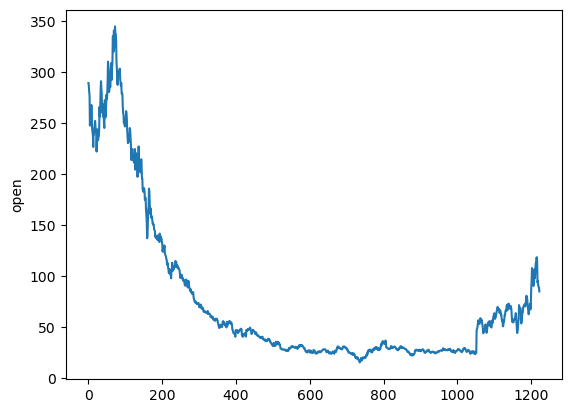

In [14]:
sns.lineplot(data['open'])

<AxesSubplot:ylabel='high'>

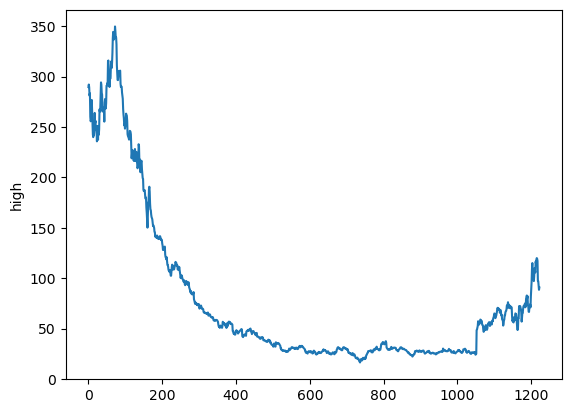

In [15]:
sns.lineplot(data['high'])

<AxesSubplot:ylabel='low'>

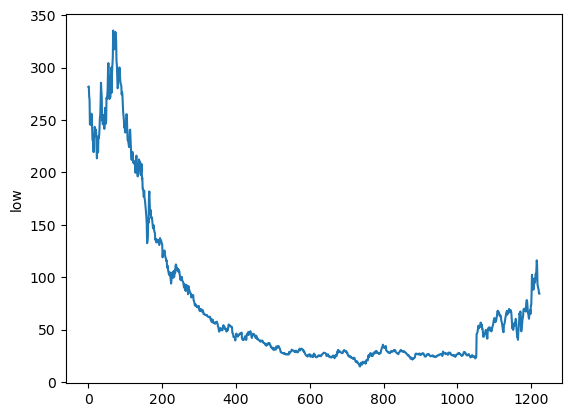

In [16]:
sns.lineplot(data['low'])

<AxesSubplot:ylabel='close'>

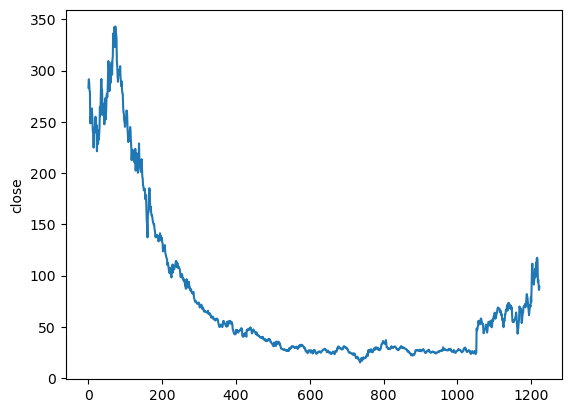

In [17]:
sns.lineplot(data['close'])

<AxesSubplot:ylabel='volume'>

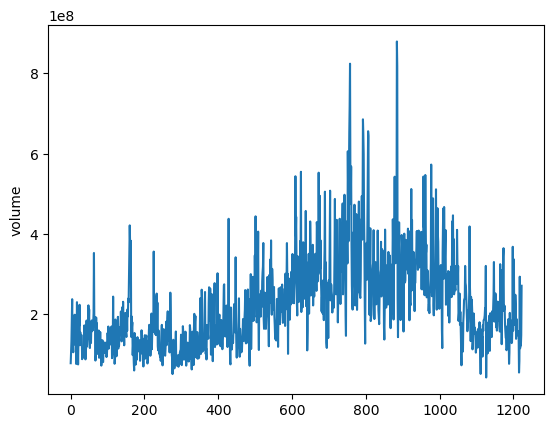

In [18]:
sns.lineplot(data['volume'])

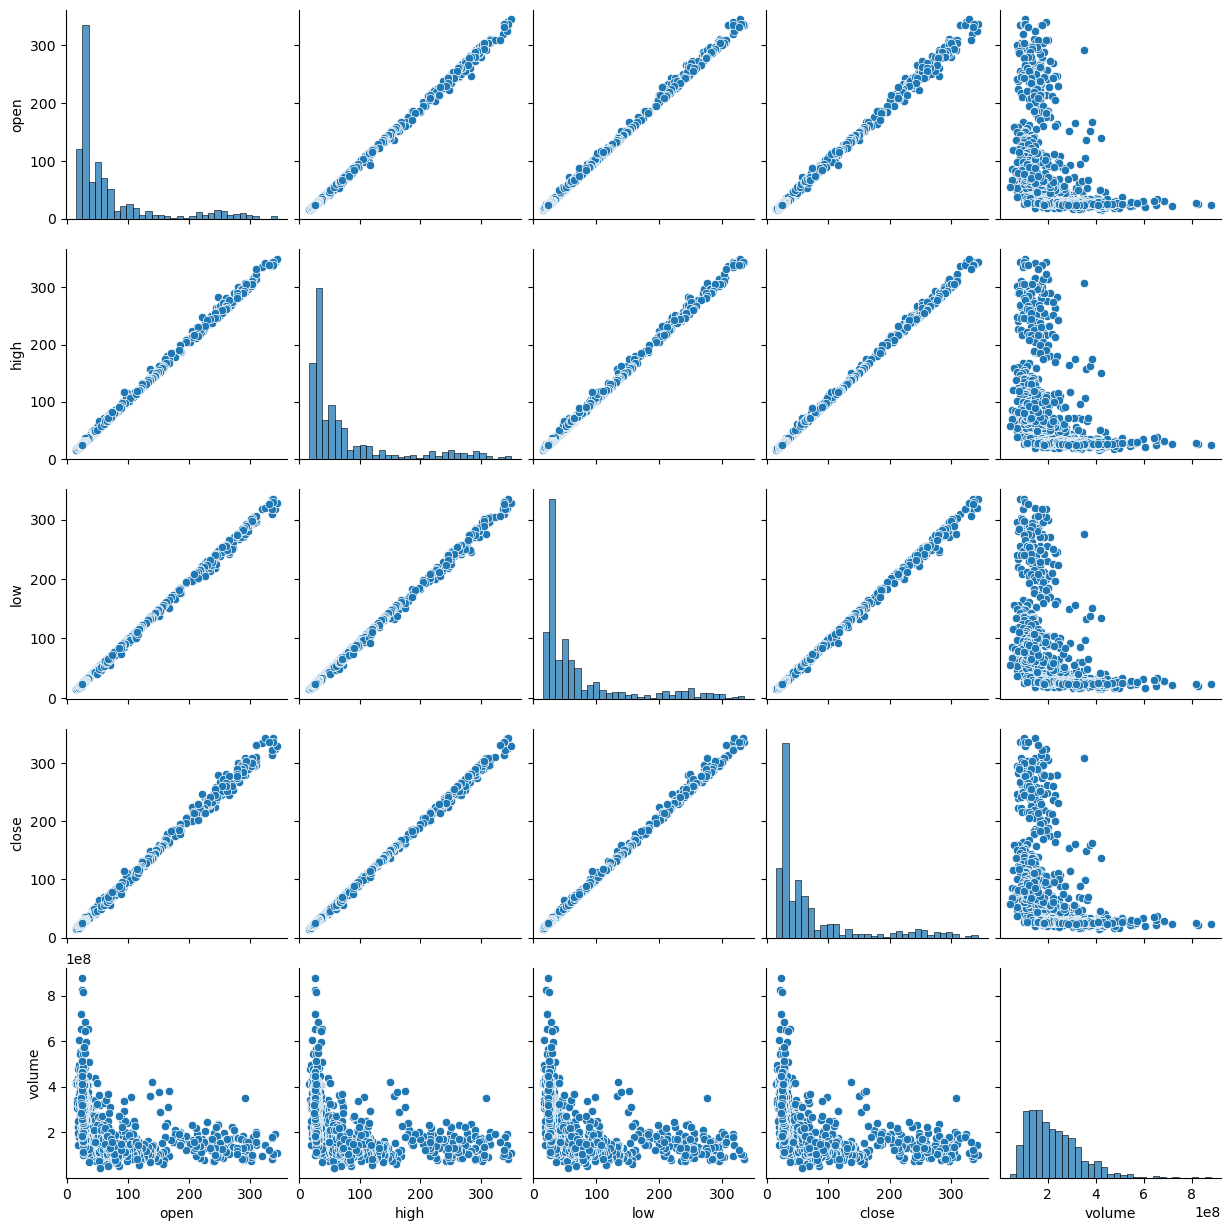

In [19]:
sns.pairplot(data)

In [20]:
from sklearn.preprocessing import MinMaxScaler


In [21]:
len(data)

1223

In [22]:
# convert these data into scalar quantity
scalar = MinMaxScaler(feature_range=(0,1))
df = scalar.fit_transform((data))


In [23]:
df

array([[0.83178921, 0.81975575, 0.8321999 , 0.81813745, 0.04244496],
       [0.82362941, 0.82719717, 0.83341652, 0.84287588, 0.07200927],
       [0.80535487, 0.81876557, 0.80226822, 0.83280969, 0.1067352 ],
       ...,
       [0.22591221, 0.23095388, 0.22928625, 0.23133941, 0.09504467],
       [0.22175338, 0.2163411 , 0.21680809, 0.21572156, 0.12615833],
       [0.21131079, 0.22309239, 0.21680809, 0.22545222, 0.27295423]])

In [24]:
print(len(df))

1223


In [25]:
#splitting data  into train and test
train = int(len(df)*0.65)
test = len(df) - train
train_data = df[:train,:]
test_data = df[train:,:]

In [26]:
# converting array into dataset metrix

def create_dataset(dataset,timestamp=1):
    train_x,train_y=[],[]
    for i in range(len(dataset)-timestamp-1):
        a = dataset[i:(i+timestamp),0]
        train_x.append(a)
        train_y.append(dataset[i+timestamp,0])
    return np.array(train_x),np.array(train_y)

In [27]:
timestamp = 100
x_train,y_train = create_dataset(train_data,timestamp)
x_test,y_test = create_dataset(test_data,timestamp)

In [28]:
print(x_train.shape,y_train.shape)


(693, 100) (693,)


In [29]:
print(x_test.shape,y_test.shape)

(328, 100) (328,)


In [30]:
# input are re shape int 3 dimensional because lstm require---

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [31]:
x_train.shape

(693, 100, 1)

In [32]:
x_test.shape

(328, 100, 1)

In [33]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 10s 309ms/step - loss: 0.0179 - val_loss: 0.0013
Epoch 2/100
11/11 [==============================] - 2s 184ms/step - loss: 0.0022 - val_loss: 9.1021e-04
Epoch 3/100
11/11 [==============================] - 2s 180ms/step - loss: 7.9133e-04 - val_loss: 9.8661e-04
Epoch 4/100
11/11 [==============================] - 2s 189ms/step - loss: 3.7968e-04 - val_loss: 0.0012
Epoch 5/100
11/11 [==============================] - 2s 202ms/step - loss: 3.8128e-04 - val_loss: 9.6295e-04
Epoch 6/100
11/11 [==============================] - 2s 188ms/step - loss: 2.8695e-04 - val_loss: 8.6396e-04
Epoch 7/100
11/11 [==============================] - 2s 220ms/step - loss: 2.8550e-04 - val_loss: 9.5343e-04
Epoch 8/100
11/11 [==============================] - 2s 185ms/step - loss: 2.7837e-04 - val_loss: 0.0011
Epoch 9/100
11/11 [==============================] - 2s 187ms/step - loss: 2.5154e-04 - val_loss: 0.0011
Epoch 10/100
11/11 [======================

In [37]:
# check model performance-
train_predict = model.predict(x_train)
test_predict =model.predict(x_test)


11/11 [==============================] - 0s 40ms/step


In [38]:
# feature tainsform in origional form

# train_predict = scalar.inverse_transform(train_predict)
# test_predict = scalar.inverse_transform(test_predict)

In [39]:
from sklearn import metrics
import math
print("error_in training",math.sqrt(metrics.mean_squared_error(y_train,train_predict)))
print("error in testing",math.sqrt(metrics.mean_squared_error(y_test,test_predict)))

error_in training 0.01473302233283127
error in testing 0.025725613447279288


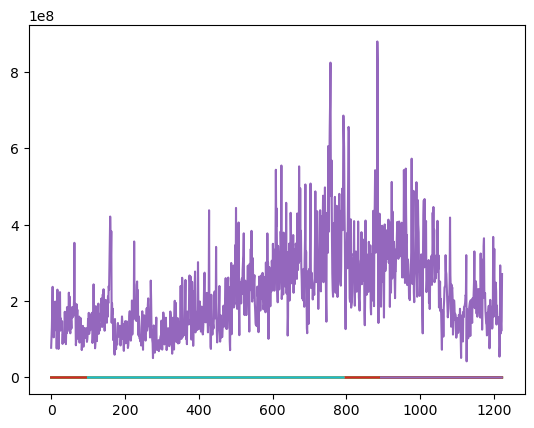

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()